# Perceptron



### INTRODUCTION
Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks. Perceptron is a linear classifier (binary). Also, it is used in supervised learning. It helps to classify the given input data. 


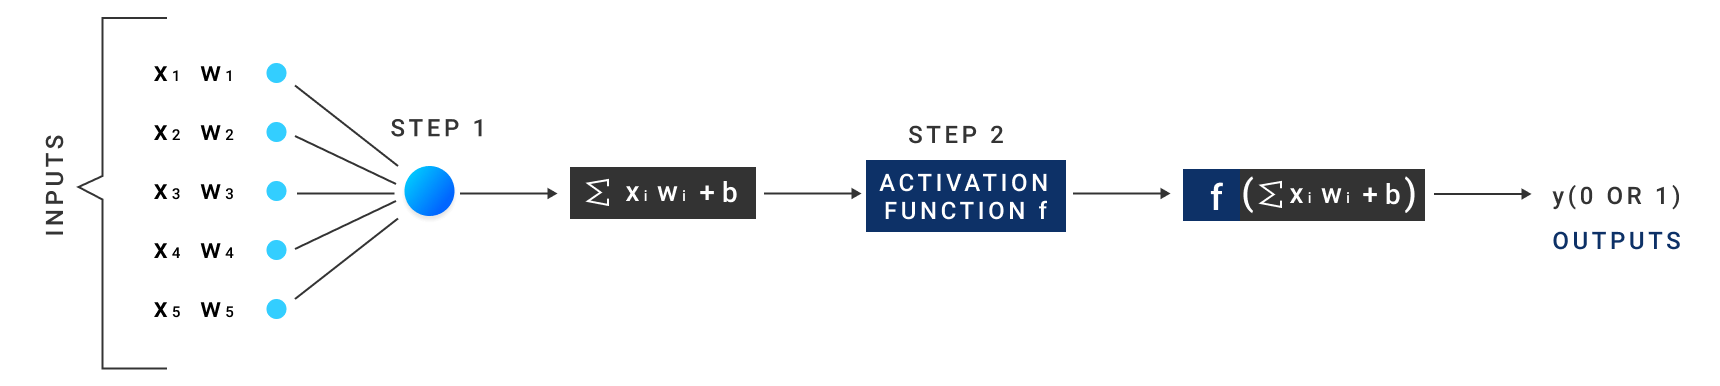


### COMPONENTS

The perceptron consists of three major components:

1. Input layer: The input layer takes the initial data into the system for further processing. Each input node is associated with a numerical value. It can take any real value.
2. Weights and bias: Weight represents the strength of the connection between units. Higher is the weight, stronger is the influence of the associated input neuron to decide the output. While, bias plays the same as the intercept in a linear equation.
3. Activation function: The activation function determines whether the neuron will fire or not. At its simplest, the activation function is a step function, but based on the scenario, different activation functions can be used.

### WORKING

- Step 1: All the input values are multiplied with their respective weights and added together. The result obtained is called weighted sum ∑wi*xi, or stated differently,  x1*w1 + x2*w2 +…wn*xn. This sum gives an appropriate representation of the inputs based on their importance. Additionally, a bias term b is added to this sum ∑wi*xi + b. Bias serves as another model parameter (in addition to weights) that can be tuned to improve the model’s performance.
- Step 2: An activation function f is applied over the above sum ∑wi*xi + b to obtain output Y = f(∑wi*xi + b). Depending upon the scenario and the activation function used, the Output is either binary {1, 0} or a continuous value. 

### IMPLEMENTATION (using Python)

In [22]:
#Importing dependencies

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
#Perceptron modelling

class Perceptron:
  def __init__(self,learning_rate=0.01,n_iters=1000):
    self.lr=learning_rate
    self.n_iters=n_iters
    self.activation_func=self._unit_step_func
    self.bias=None
    self.weights=None

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0
    y_= np.array([1 if i > 0 else 0 for i in y])
    for _ in range(self.n_iters):
      for idx,x_i in enumerate(X):
        linear_output=np.dot(x_i,self.weights)+self.bias
        y_predicted=self.activation_func(linear_output)
        update=self.lr * (y_[idx]-y_predicted)
        self.weights+=update*x_i
        self.bias+=update

  def predict(self,X):
    linear_output=np.dot(X,self.weights)+self.bias  
    y_predicted=self.activation_func(linear_output)
    return y_predicted

  def _unit_step_func(self,x):
    return np.where(x>=0,1,0)

Perceptron classification accuracy:  1.0


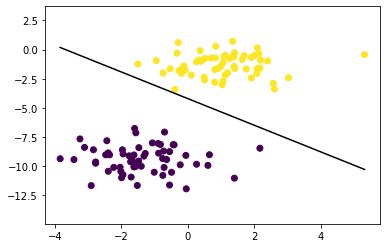

In [21]:
#Perceptron testing

def accuracy(y_true,y_pred):
  accuracy=np.sum(y_true==y_pred)/len(y_true)
  return accuracy
X,y=make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

p=Perceptron(learning_rate=0.01,n_iters=1000)
p.fit(X_train,y_train)
predictions=p.predict(X_test)

print("Perceptron classification accuracy: ",accuracy(y_test,predictions))

fig=plt.figure()

ax=fig.add_subplot(1,1,1)

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train)

x01=np.amin(X_train[:,0])
x02=np.amax(X_train[:,0])

x11=(-p.weights[0]*x01-p.bias)/p.weights[1]
x12=(-p.weights[0]*x02-p.bias)/p.weights[1]

ax.plot([x01,x02],[x11,x12],'k')

ymin=np.amin(X_train[:,1])
ymax=np.amax(X_train[:,1])

ax.set_ylim([ymin-3,ymax+3])

plt.show()

### REFERENCES

- https://en.wikipedia.org/wiki/Perceptron
- https://www.analyticsvidhya.com/blog/2021/10/perceptron-building-block-of-artificial-neural-network/
